### Table of Contents
* [Project Description](#chapter)

* [Chapter 1: Open the data file and study the general information](#chapter1)
    * [Section 1.1: Open the Data File](#section_1_1)
    * [Section 1.2: General information of Data](#section_1_2)
      
 
* [Chapter 2: Data preprocessing](#chapter2)
    * [Section 2.1: Missing Values Identification](#section_2_1)
    * [Section 2.2: Filling Missing Values](#section_2_2)
    * [Section 2.3: Conclusion](#section_2_3)
    * [Section 2.4: Datatype Conversion](#section_2_4)
    

* [Chapter 3: Calculate and add to the table the following:](#chapter3)
    * [Section 3.1: Day of the week, month, and year the ad was placed](#section_3_1)
    * [Section 3.2: The vehicle's age (in years) when the ad was placed ](#section_3_2)
    * [Section 3.3: The vehicle's average mileage per year ](#section_3_3)
    * [Section 3.4: Replacing values with numeric scale.](#section_3_4)

    
* [Chapter 4: Exploratory Data Analysis](#chapter4)
    * [Section 4.1: Study of outliers affect and readability of the histograms](#section_4_1)
    * [Section 4.2: Outliers Handling and filtered data visualization ](#section_4_2)
    * [Section 4.3: Typical lifetime of ads placed ](#section_4_3)
    * [Section 4.4: Average price of each car category and highest selling cars. ](#section_4_4)
    * [Section 4.5: Factors impact the price most ](#section_4_5)
    
    
* [Chapter 5: Conclusion](#chapter5)

### Chapter 1: Open the data file and study the general information <a class="anchor" id="chapter1"></a>

#### Section 1.1: Open the data File <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [3]:
try:
    data=pd.read_csv('vehicles_us.csv')
except:
    data=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\vehicles_us.csv.csv")
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


#### Section 1.2: General information of Data <a class="anchor" id="section_1_2"></a>

In [4]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


There are total 51525 indices in the dataset and we can also get an idea that there are some columns with missing values which we investigae in next steps. The most data values are in 75% or above category which also shows the negative scewness of dataset. The minimum value for odometer is zero which demonstrate that the values are most probably missing or some cars are brand new on website. The above steps we will discuss one by one below.

### Chapter 2: Data Preprocessing <a class="anchor" id="chapter2"></a>

#### Section 2.1: Missing Values Identification <a class="anchor" id="section_2_1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


By Applying the info() methods we can observe that columns, model_year,cylinders, odometer, paint_color, and is_4wd have less values compare to total indicies.

In [6]:
print(data.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


So the isna and sum functions have given us number of missing values in each column. The most interesting is is_4wd. The quite reason for missing values in this column is as it is a boolean datatype so missing values could be False or 0. 

In [7]:
data['model_year'].isna().value_counts()

False    47906
True      3619
Name: model_year, dtype: int64

#### Section 2.2: Filling Missing Values <a class="anchor" id="section_2_2"></a>

__is_4wd:__

As discusssed above, we have filled the is_4wd column values with 0 as it's a booleanvalues which represents either the car is 4WD or not. Secondly, the total number of missing values is half of total values in this column.

In [8]:
data['is_4wd'].fillna(value=0, inplace=True)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


__model_year__

The extracted dataset above has verified the missing values in the column model_year. The possible reason of missing values would be manual data entry procedures, equipment errors and incorrect measurements i.e the datatype error. The second reason could be the outliers so model_year may accept only range of years but as some have putted the out of range years that has occured and NAN value.

To fill missing indicies in model_year column, the model, is_4wd, transmission, and type can help because these are core specifications of any model. We will use groupby() methods and group data.   

__Methodology__

The idea is to group model column  with other specification and observe the preciseness of idx. i.e. in how many groups the data has divided. i.e. when the model and is_4wd colmuns were grouped, the idx has only two values which 3,2. The second finding could be, is the same model car has other specifications i.e. type, transmission are same or not? if they are same so we will use the group data to fill missing value.

We will also check the mode and median of the column, so that we can decide which is more accurate to fill the missing value.

In [9]:
data[data['model_year'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


In [10]:
data['idx']=data.groupby(['model', 'is_4wd']).ngroup()
y=data.loc[data['model'] == 'bmw x5']
y['idx'].unique()

array([3, 2], dtype=int64)

The model bmw x5 is grouped into two subgrouped.

In [11]:
data['idx']=data.groupby(['model', 'transmission']).ngroup()
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idx
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,83
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,166
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,83
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,54


In [12]:
data1=data.loc[data['model'] == 'bmw x5']
data1['idx'].unique()

array([2, 3, 4], dtype=int64)

 The same car model is subgrouped into 3.

In [13]:
data['idx']=data.groupby(['model', 'type']).ngroup()
yyy=data[data['model'] == 'bmw x5']
#yyy['idx'].unique()
yyy.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idx
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,3
58,3200,2004.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,black,1.0,2019-04-09,10,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52,3
204,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-08-11,19,3
271,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-07-07,9,3


In [14]:
data['model_year_median'] = data.groupby(['model','is_4wd'], sort=False)['model_year'].apply(lambda x: x.fillna(x.median()))

In [15]:
data['model_year_mode']=data.groupby('model')['model_year'].transform(lambda x:x.fillna(x.mode()[0]))
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idx,model_year_median,model_year_mode
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,3,2011.0,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,149,2012.0,2013.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,289,2013.0,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,149,2003.0,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,98,2017.0,2017.0


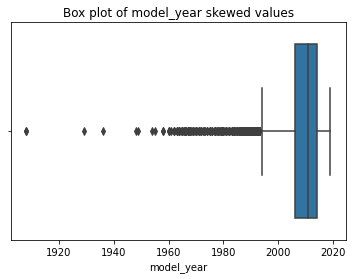

In [16]:
import seaborn as sns
# Box plot
ax=sns.boxplot(data.model_year)
ax.set(title='Box plot of model_year skewed values');#xlabel='common xlabel', ylabel='common ylabel', 

The possible reason of missing values would be manual data entry procedures, equipment errors and incorrect measurements i.e the datatype error. The second reason could be the outliers so model_year may accept only range of years but as some have putted the out of range years that has occured and NAN value.

The mode and median methods have applied and filled the missing values. The data was grouped with model and applied transform method. The histogram was plotted for each methods and observe the central tendency of data. As it can be observed from the box plot above that the data is skewed. There are several or large number of data points as outliers. Outliers data points will have significant impact on the mean and hence, in our case, it is not recommended to use mean for replacing the missing values. Using mean value for replacing missing values may not create a great model and hence gets ruled out. We will continue with median/mode method to fill missing values.

Text(0, 0.5, 'no. of vehicles')

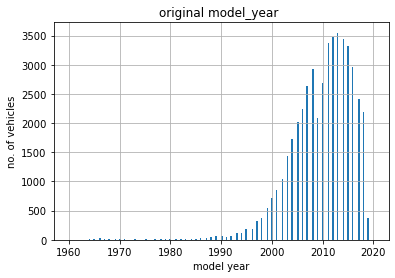

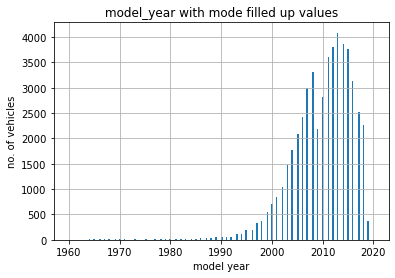

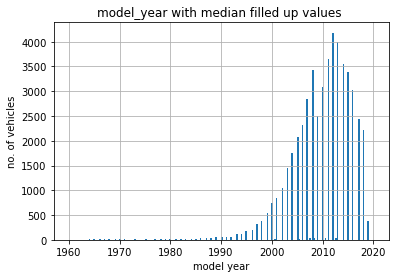

In [17]:
data.hist('model_year', bins=200, range=(1960, 2020));
plt.title('original model_year ')
plt.xlabel('model year')
plt.ylabel('no. of vehicles')
data.hist('model_year_mode', bins=200, range=(1960,2020));
plt.title(' model_year with mode filled up values ')
plt.xlabel('model year')
plt.ylabel('no. of vehicles')
data.hist('model_year_median', bins=200, range=(1960,2020));
plt.title('model_year with median filled up values ')
plt.xlabel('model year')
plt.ylabel('no. of vehicles')

The above visualization shows the same distribution for mode and median filled values even changing the bin size  for model_year. There is a peak for 2013. which we will explore more in the steps below.

In [18]:
data['model_year'].mode()
data[data['model_year']==2013].count()

price                3549
model_year           3549
model                3549
condition            3549
cylinders            3204
fuel                 3549
odometer             2976
transmission         3549
type                 3549
paint_color          2874
is_4wd               3549
date_posted          3549
days_listed          3549
idx                  3549
model_year_median    3549
model_year_mode      3549
dtype: int64

In [19]:
data['model_year_median'].mode()

0    2012.0
dtype: float64

In [20]:
data['model_year_mode'].mode()

0    2013.0
dtype: float64

In [21]:
data['model_year'].value_counts().head(2)

2013.0    3549
2012.0    3468
Name: model_year, dtype: int64

The year 2013 looks good year for car manufacturing companies. The number of cars belong to this group is almost double than average of other years. That's thr mode, it's evince that we can use mode rather than median to fill the missing values because year 2013 can't be ignore.

In [22]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idx,model_year_median,model_year_mode
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,3,2011.0,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,149,2012.0,2013.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,289,2013.0,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,149,2003.0,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,98,2017.0,2017.0


In [23]:
data['model_year']=data.groupby('model')['model_year'].transform(
lambda x:x.fillna(x.mode()[0])) #https://stackoverflow.com/questions/6486387/implement-list-like-index-access-in-python
data=data.drop(columns =['idx', 'model_year_median','model_year_mode'])
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


So there are still 3 (cylinders, odometer, paint_color) columns with missing values.

__Missing Values Cylinders__

The missing values in cylinders could be filled by grouping the data column model with it's type of vehicles. Definitely, the truck, bus would have different no. of cyliners compare to the sedan or mini-van.

In [25]:
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [26]:
#data['type'].unique()

In [27]:
#data['fuel'].unique()

In [28]:
#data['idx']=data.groupby(['model', 'type']).ngroup()
data['cylinders']= data.groupby(['model','type'], sort=False)['cylinders'].apply(lambda x: x.fillna(x.median()))
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51510 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


There are still 15 values missing in cylinders we will investigate the reason of these missing values.

In [30]:
missing_values=data[data['cylinders'].isnull()]
#missing_values['model'].value_counts()
missing_values.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
6892,21000,2015.0,jeep grand cherokee,like new,NaN,gas,75000.0,automatic,hatchback,grey,0.0,2018-10-05,12
12901,6999,2011.0,jeep liberty,excellent,NaN,gas,111500.0,automatic,van,silver,1.0,2018-08-06,21
14354,3000,2005.0,toyota sienna,fair,NaN,gas,NaN,automatic,pickup,NaN,0.0,2019-04-01,47
15985,1800,2000.0,toyota corolla,fair,NaN,gas,120768.0,automatic,truck,grey,0.0,2019-03-28,89
16604,7800,2001.0,ford f350 super duty,good,NaN,diesel,277512.0,automatic,sedan,red,1.0,2019-02-21,54


The reason of missing values in the cylinders columns is that the model type is different for each car in the model column. There is also a typo for ford f250 and ford f-250. The remaining missing values have replaced with the median of overall median of the cyliners data

In [31]:
data['cylinders'].fillna(data['cylinders'].median(), inplace=True)

__Pain_Color:__ 
    
Missing values handling. 

In [32]:
data['paint_color']= data.groupby(['model'], sort=False)['paint_color'].apply(lambda x: x.fillna(x.mode().iloc[0]))
data['paint_color'].fillna(data['paint_color'].mode()[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The missing values in paint_color has filled with the mode of the car colors with grouping model.  These can also be filled by 'unknown.

In [33]:
data['model'].isnull().values.any()

False

In [34]:
data['model_year'].isnull().values.any()

False

In [35]:
data['cylinders'].isnull().values.any()

False

In [36]:
data['cylinders'].isnull().sum()

0

We can analyze that there are no missing values now in model, model_year, and cylinders.

__Odometer__ 

In [37]:
data['odometer']=data.groupby(['model_year','condition'], sort=False)['odometer'].apply(lambda x:x.fillna(x.median()))
#data["odometer"] = data.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

The odometer missing values have replaced with the same methods median as discussed above.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51518 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


There are 7 missing values remaining in odometer. Let's investigate.

In [39]:
data[data['model'] == "chevrolet corvette"]
# data[data['condition'] == "fair"]''
data_test2 = data[data['model'] == "chevrolet corvette"]
data_test2 = data_test2[data_test2['condition'] == "fair"]
data_test2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
255,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000.0,automatic,coupe,blue,0.0,2019-01-15,49
13061,3500,1986.0,chevrolet corvette,fair,8.0,gas,131500.0,automatic,coupe,purple,0.0,2019-01-11,7
13425,4100,1981.0,chevrolet corvette,fair,8.0,gas,133000.0,automatic,coupe,white,0.0,2018-12-09,12
17692,5500,1987.0,chevrolet corvette,fair,8.0,gas,157000.0,manual,convertible,black,0.0,2018-06-11,23
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
22080,2900,1996.0,chevrolet corvette,fair,8.0,gas,0.0,automatic,coupe,purple,0.0,2018-12-16,7
22189,5000,1985.0,chevrolet corvette,fair,8.0,gas,85123.0,automatic,coupe,red,0.0,2018-10-25,10
29494,3000,1988.0,chevrolet corvette,fair,8.0,gas,120000.0,automatic,convertible,black,0.0,2018-06-24,7
32612,5500,1985.0,chevrolet corvette,fair,8.0,gas,220000.0,automatic,coupe,white,0.0,2019-03-12,116
34471,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000.0,automatic,coupe,red,0.0,2018-07-26,10


In [40]:
data_test2['odometer'].median()

120000.0

We will check is there any  problem with the datatype by filling the value with 10000. It has replaced, we also observed 0 below the missing values. A thought was may be 0 and nan creating a problem for jupyter to read. But this hypothesis was rejected after filling values with 10000.

In [41]:
data_test2['odometer']=data_test2.groupby(['model_year','condition'], sort=False)['odometer'].apply(lambda x:x.fillna(10000))
data_test2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
255,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000.0,automatic,coupe,blue,0.0,2019-01-15,49
13061,3500,1986.0,chevrolet corvette,fair,8.0,gas,131500.0,automatic,coupe,purple,0.0,2019-01-11,7
13425,4100,1981.0,chevrolet corvette,fair,8.0,gas,133000.0,automatic,coupe,white,0.0,2018-12-09,12
17692,5500,1987.0,chevrolet corvette,fair,8.0,gas,157000.0,manual,convertible,black,0.0,2018-06-11,23
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,10000.0,automatic,sedan,red,0.0,2018-12-15,18
22080,2900,1996.0,chevrolet corvette,fair,8.0,gas,0.0,automatic,coupe,purple,0.0,2018-12-16,7
22189,5000,1985.0,chevrolet corvette,fair,8.0,gas,85123.0,automatic,coupe,red,0.0,2018-10-25,10
29494,3000,1988.0,chevrolet corvette,fair,8.0,gas,120000.0,automatic,convertible,black,0.0,2018-06-24,7
32612,5500,1985.0,chevrolet corvette,fair,8.0,gas,220000.0,automatic,coupe,white,0.0,2019-03-12,116
34471,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000.0,automatic,coupe,red,0.0,2018-07-26,10


In [42]:
missing_value_odo=data[data['odometer'].isnull()]

In [43]:
missing_value_odo=data[data['odometer'].isnull()]
missing_value_odo

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,red,0.0,2018-11-03,41
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,0.0,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-17,38
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,0.0,2018-11-08,23


It's look that ford mustang, chevrolet impala, ford f-150, cadillac escalade have no other group values so we can drop these values or fill with median. For chevrolet corvette we will replace with a manual median value.

In [44]:
data['odometer'].fillna(data['odometer'].median(), inplace=True)

In [45]:
data=data.dropna()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


#### Section 2.3: Conclusion <a class="anchor" id="section_2_3"></a>

The dataset msiing values have replaced by applying grouping, transform and mean, median and mode methods. The model_year missing values were replaced by grouping data referencing the model of cars. The same method was applied for condition, cylinders, odometer, paint_color columns. For is_4wd column the values were replaced by 0 as it's a boolean values which represents the car is 4WD or not. The reason for missing values for is_4wd would be the data engineer has given option only to tick or put 1 if the car is 4WD otherwise the entry can left empty. For model_year, the car model could represent the manufacture year so many don't feel necessary to fill these column values. That case could be for other columns as well. and for paint_color missing values, the customers may have upload the picture and don't bother to write the color as well.

#### Section 2.4: Datatype Conversion <a class="anchor" id="section_2_4"></a>

__Explanation of which columns had the data types changed and why?__

The columns model, condition, fuel, transmission, type, paint_color, and date_posted are string (object) datatype so we don't need to change these values. But the price, model_year, cyliners and is_4wd are float or int types. The price has change with float as the is more realistic but the other columns values need to be even number but not whole so they have converted to the integer datatype.

In [47]:
#Changing Datatypes of Price to float and model_year,cylinders,is_4wd to int
data['price'] = data['price'].astype('float')
 
data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  int32  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int32(3), int64(1), object(7)
memory usage: 4.9+ MB


As the datatype has changed for the numerical values columns to int and float depending upon the column representations i.e. price is kept in float and is_4wd is kept as interger. The info() methods has confirmed the datatype change and also that no missing value is remaining in dataset.

### Chapter 3: Calculate and add to the table the following <a class="anchor" id="chapter3"></a>

#### Section 3.1: calculated and added to the table: day of the week, month, and year the ad was placed <a class="anchor" id="section_3_1"></a>
#### Section 3.2: calculated and added to the table: the vehicle's age (in years) when the ad was placed <a class="anchor" id="section_3_2"></a>
#### Section 3.3: calculated and added to the table: the vehicle's average mileage per year <a class="anchor" id="section_3_3"></a>

In [49]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data['day_of_week']=pd.DatetimeIndex(data['date_posted']).weekday
data['month'] = pd.DatetimeIndex(data['date_posted']).month
data['year'] = pd.DatetimeIndex(data['date_posted']).year
data['vehicle_age']=data['year']-data['model_year']
# there are some vehicles whose age is zero so we will replace these values with 1. 
data['vehicle_age'] = data['vehicle_age'].replace([0],1)
data['average_milage']= data['odometer']/data['vehicle_age']
data['average_milage'] = data['average_milage'].astype('int')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500.0,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,12115
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


#### Section 3.4: Replacing values with numeric scale. <a class="anchor" id="section_3_4"></a>

n the condition column, replace string values with a numeric scale:

new = 5

like new = 4

excellent = 3

good = 2

fair = 1

salvage = 0

In [50]:
dic={'new':5, 'like new': 4, 'excellent':3, 'good': 2, 'fair':1, 'salvage':0}

In [51]:
data['condition']=data['condition'].apply(lambda x:dic[x])

In [52]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500.0,2003,ford f-150,1,8,gas,193850.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,12115
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


The dataset date_posted column was converted into date_time and afterwards the day, month, year were extraxted and added into new columns. The vehicle age was calculated by subtracting the model year of car from the date of posted ad of specific car. There are some vehicles whose age is zero so we will replace these values with 1 as the vehicles of this category were advertised within one year of buying. The average_mileage of the vehicles were calculated by dividing the odometer reading to it's age. In the last step, the condition categorical values were transforrmed into the numeric values as 5 = new and to downward trend respectively. 

### Chapter 4: Exploratory Data Analysis <a class="anchor" id="chapter4"></a>

#### Section 4.1: Study of outliers affect and readability of the histograms.<a class="anchor" id="section_4_1"></a>

_-Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms._

The histograms of price, vehicle's age when ad was placed, mileage, number of cylinders, and conditon have plotted to observed the outliers. 

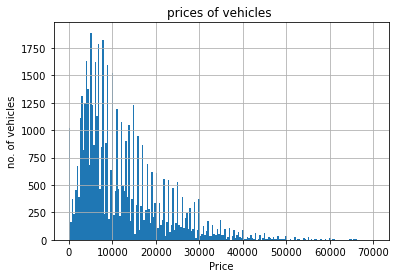

In [53]:
data.hist('price', bins=200, range=(0,70000))
plt.title('prices of vehicles ')
plt.xlabel('Price')
plt.ylabel('no. of vehicles');

The most of price lies under range 30,000. The remaining value after looks like outliers which we will handle in the next steps. 

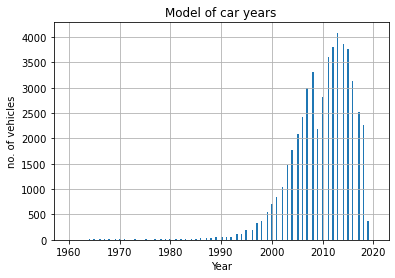

In [54]:
data.hist('model_year', bins=200, range=(1960,2020))
plt.title('Model of car years')
plt.xlabel('Year')
plt.ylabel('no. of vehicles');

The models of car moslty lied in 2000 to 2020 range. 

Our dataset column model_year has continous data values. The skewness of data towards is Poisson Distribution. The years before 2000 are outliers which will be removed to change data into normal distribution.

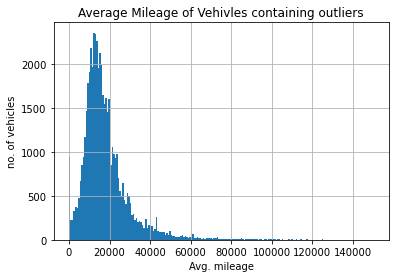

In [55]:
data.hist('average_milage', bins=200, range=(0,150000))
plt.title('Average Mileage of Vehivles containing outliers')
plt.xlabel('Avg. mileage')
plt.ylabel('no. of vehicles');

The average_milage mostly belongs to 0-20000 range. The valeus after 60000 are very minimal which can be handle as outliers.

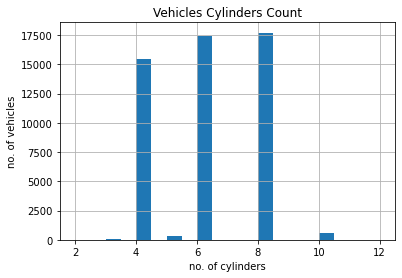

In [56]:
data.hist('cylinders', bins=20, range=(2,12))
plt.title('Vehicles Cylinders Count')
plt.xlabel('no. of cylinders')
plt.ylabel('no. of vehicles');

The mostly car has 8 cylinders and other has 6, 4 , 10, 5, or 3 cylinders. The remaining values belongs to minimal categories.

In [57]:
data['cylinders'].unique()

array([ 6,  4,  8,  5, 10,  3,  7, 12])

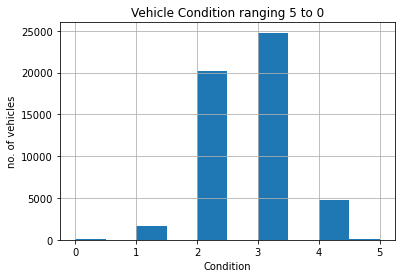

In [58]:
data.hist('condition', bins=10, range=(0,5))
plt.title('Vehicle Condition ranging 5 to 0')
plt.xlabel('Condition')
plt.ylabel('no. of vehicles');

The mostly cars are in execellent labelled category followed by good and fair and salvage have very less valeus.

In [59]:
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

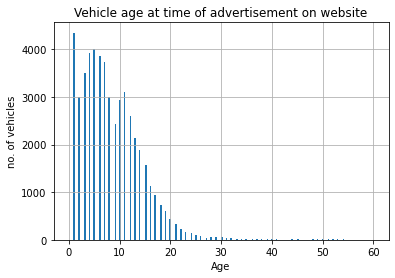

In [60]:
data.hist('vehicle_age', range=(0,60), bins=200)
plt.title('Vehicle age at time of advertisement on website')
plt.xlabel('Age')
plt.ylabel('no. of vehicles');

The new cars (age=1) are alot in market for new sale. Why so? Mostly cars are under 10 years old. After 30 years of cars are mereley available in market to resale. The outliers after 30 is skewing the data and will remove these outliers.

The below code is to just explore the data and find some new clues.

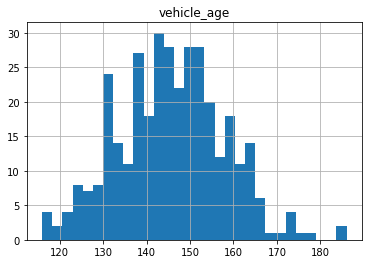

In [61]:
date_age = data.pivot_table(index='date_posted', values='vehicle_age', aggfunc='count')
date_age.hist('vehicle_age', bins=30);

In [62]:
date_age.head()

,vehicle_age
date_posted,
2018-05-01,124
2018-05-02,155
2018-05-03,164
2018-05-04,150
2018-05-05,133


__Automation of Histograms for varialbes.__

In [63]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500.0,2003,ford f-150,1,8,gas,193850.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,12115
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


In [64]:
numerical = [
  'price', 'model_year', 'condition', 'cylinders', 'odometer', 'is_4wd', 'days_listed','day_of_week','month','year', 'vehicle_age','average_milage'
]
categorical = [
  'model', 'fuel', 'transmission', 'type', 'paint_color'
]
data_hist=data[numerical+categorical]
data_hist.shape

(51525, 17)

__Analyzing Numerical Variables__

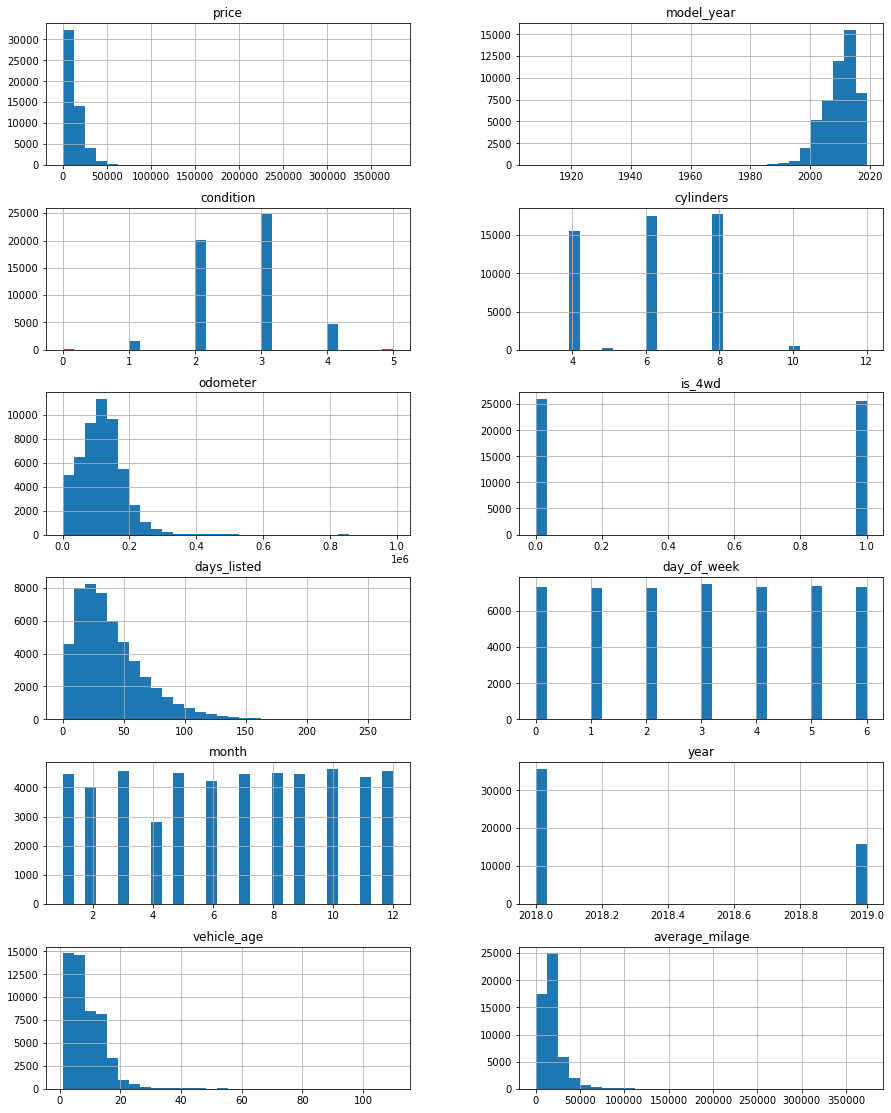

In [65]:
import seaborn as sns
data_hist[numerical].hist(bins=30, figsize=(15, 40), layout=(12, 2));


The graphs above are automated data visualization of the numerical columns in our dataset. We have discuss all these graphs one by one above. This visualization also demonstrate the poisson distribution in our dataset. The conditon column has s normal distribution. The day_of_week has a great data info that is the website has a good trafic almost each day in the week. 

In [66]:
import seaborn
import sys
import matplotlib
import matplotlib.pyplot as plt

In [67]:
'''fig, ax = plt.subplots(3, 2, figsize=(15, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data_hist[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)'''

'''try'''

'try'

__Analyzing Categorical Values__

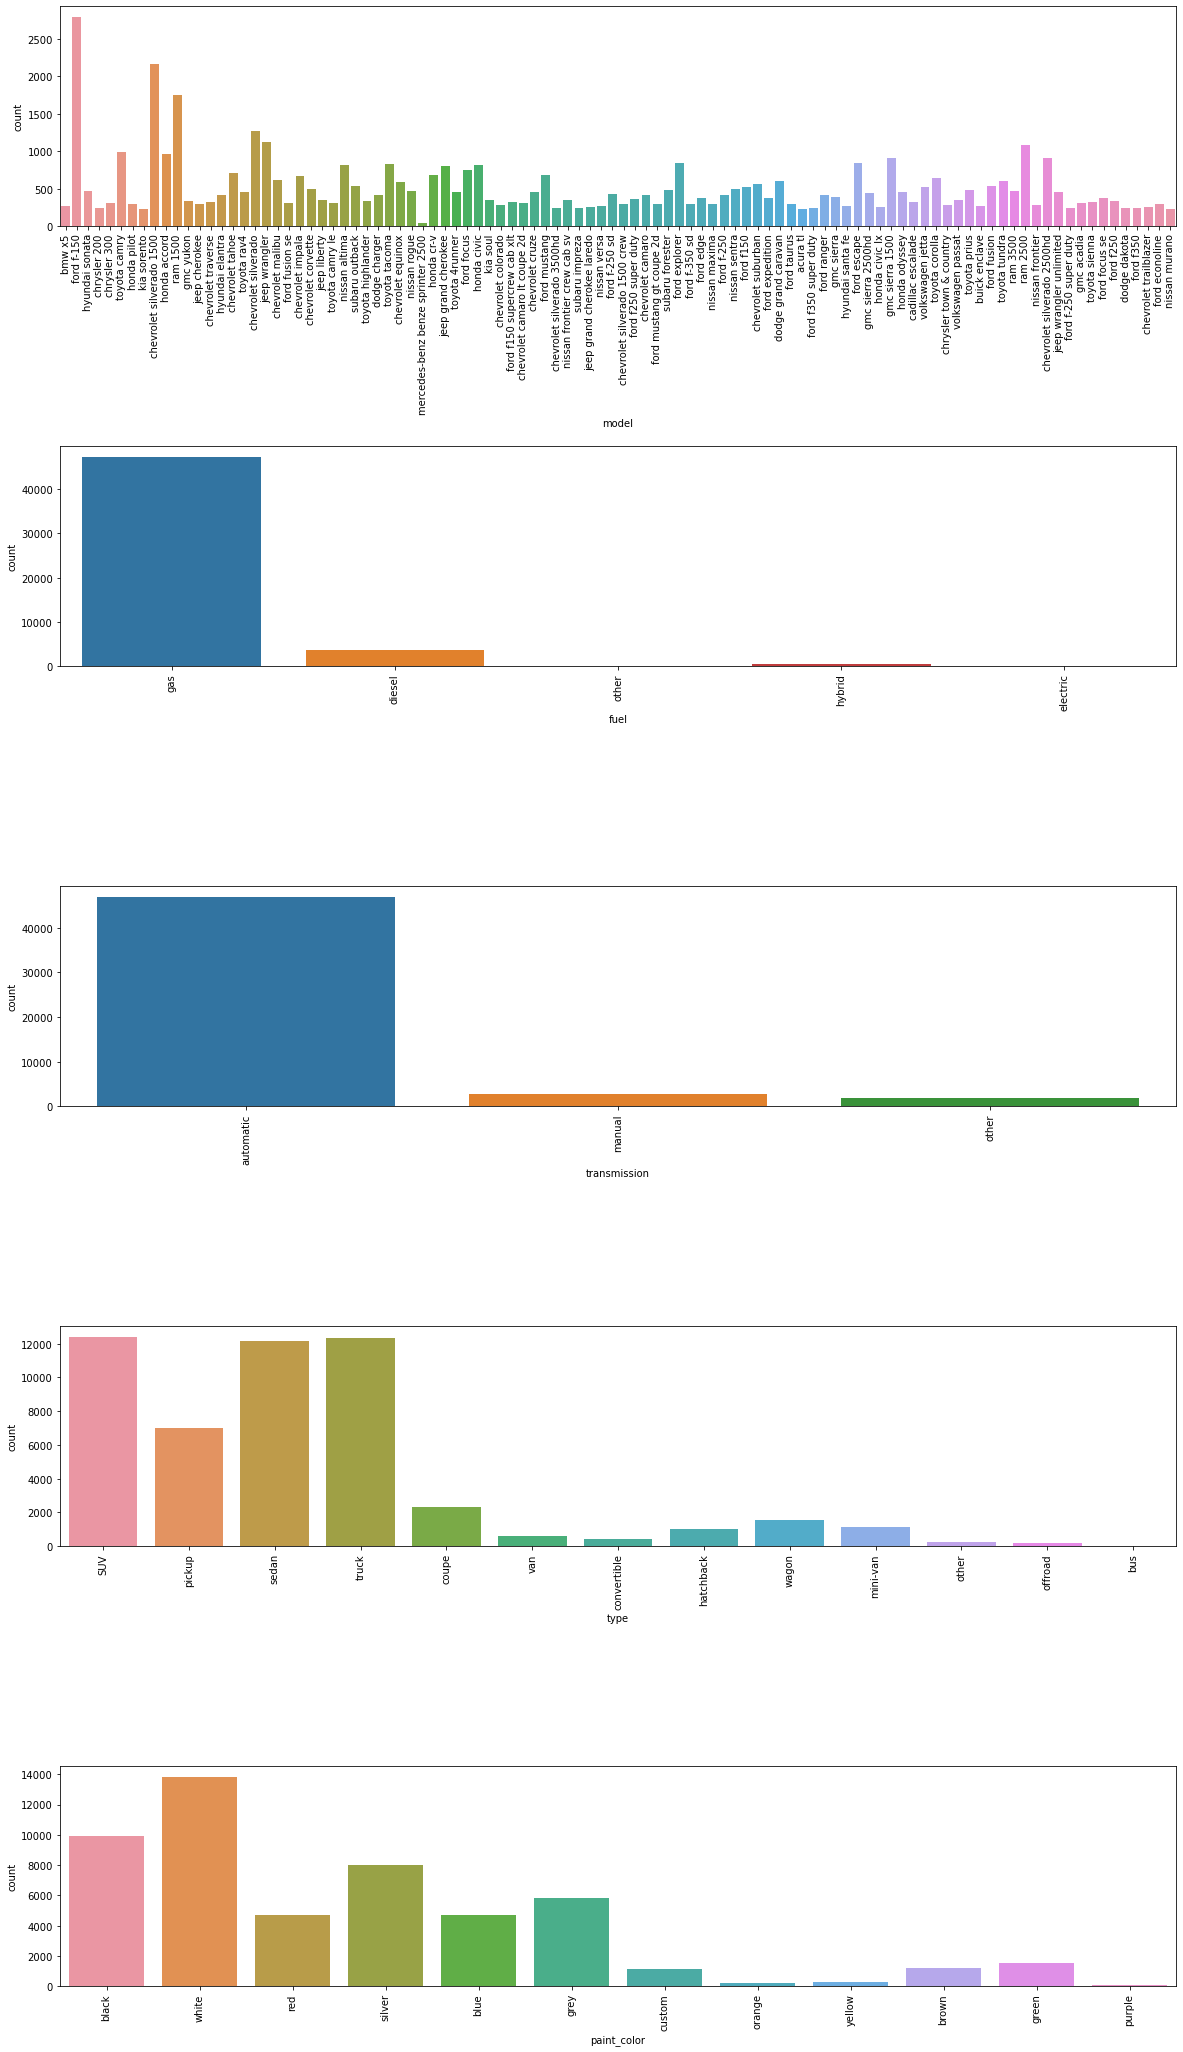

In [68]:
fig, ax = plt.subplots(len(categorical),1, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data_hist[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        plt.subplots_adjust(top = 1.5, hspace=1)

In the categorical data columns visualization, the vehicle model f-150 has highest number of adversitement followed by chevrolet silverado 1500. Most of the cars are run by gas and automatic transmission. The sedan, SUV and truck has highest no of vehicle type. The most car were sold was in color white after black.

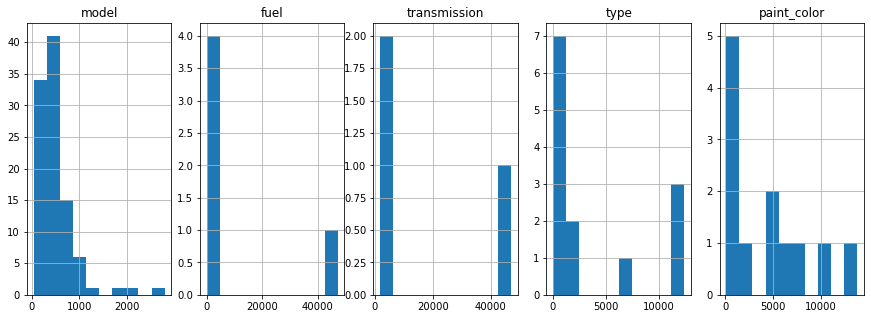

In [69]:
fig, ax = plt.subplots(1, len(categorical))
for i, categorical in enumerate(data_hist[categorical]):
    data_hist[categorical].value_counts().hist( ax=ax[i], figsize=(15, 5)).set_title(categorical)

#### Section 4.2: Outliers Handling <a class="anchor" id="section_4_2"></a>


_-Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data._

__Approach__

The interquartile range (IQR) was applied, based on dividing a data set into quartiles.
The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively. The IQR values were calculated for the each variables data's outliers were removed by query method, Afterward the histogram for each variable was plotted. For the numerical variables histograms were plotted to visualize the data and boxplot were plotted for the categorical varaibles.

In [70]:
data['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [71]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500.0,2003,ford f-150,1,8,gas,193850.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,12115
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


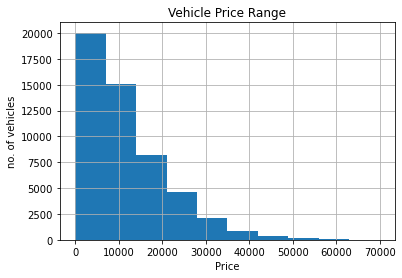

In [72]:
data['price'].hist(range=(0,70000))
plt.title('Vehicle Price Range')
plt.xlabel('Price')
plt.ylabel('no. of vehicles');

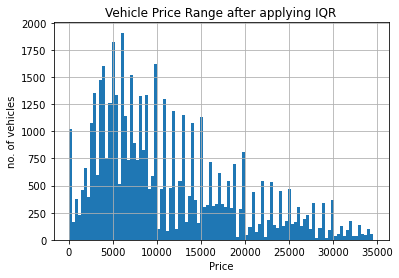

In [73]:
'''Removing outliers from price'''

Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
data_price_new = data.query('price >= @Q1_price - 1.5*@IQR_price and price <= @Q3_price+1.5*@IQR_price')
data_price_new
data_price_new.hist('price', bins=100)
plt.title('Vehicle Price Range after applying IQR')
plt.xlabel('Price')
plt.ylabel('no. of vehicles');

The price column values are more in a precise range and all values are landing in range of 0-35000 as compare to the 0-70000 range of before.

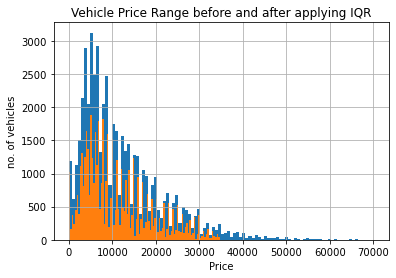

In [74]:
data['price'].hist(range=(0,70000), bins=100) and data_price_new['price'].hist(range=(0,35000), bins=100)
plt.title('Vehicle Price Range before and after applying IQR')
plt.xlabel('Price')
plt.ylabel('no. of vehicles');
plt.show()

The filtered data and the original data['price'] vales can be observed in the above histogram. the outliers has removed and data values has more uniform distribution.

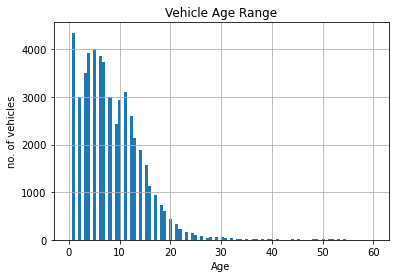

In [75]:
'''Vehicle_age outliers handling'''
data['vehicle_age'].hist(range=(0,60), bins=100)
plt.title('Vehicle Age Range')
plt.xlabel('Age')
plt.ylabel('no. of vehicles');

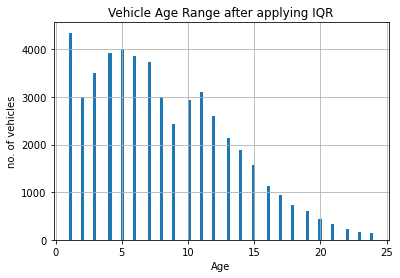

In [76]:
Q1_vehicle_age = data['vehicle_age'].quantile(0.25)
Q3_vehicle_age = data['vehicle_age'].quantile(0.75)
IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age
data_vehicle_age_new = data.query('vehicle_age >= @Q1_vehicle_age - 1.5*@IQR_vehicle_age and vehicle_age <= @Q3_vehicle_age+1.5*@IQR_vehicle_age')
data_vehicle_age_new
data_vehicle_age_new.hist('vehicle_age', bins=100)
plt.title('Vehicle Age Range after applying IQR')
plt.xlabel('Age')
plt.ylabel('no. of vehicles');

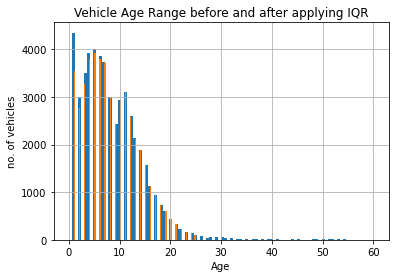

In [77]:
data['vehicle_age'].hist(range=(0,60), bins=100) and data_price_new['vehicle_age'].hist(range=(0,25), bins=100)
plt.title('Vehicle Age Range before and after applying IQR')
plt.xlabel('Age')
plt.ylabel('no. of vehicles');
plt.show()

The filtered data and the original data['vehicle_age'] vales can be observed in the above histogram. the outliers has removed and data values has more uniform distribution. The new range of data values are 0-25 as previously the data was more distributed. The highest value is now around 4000 as previusly 46000.

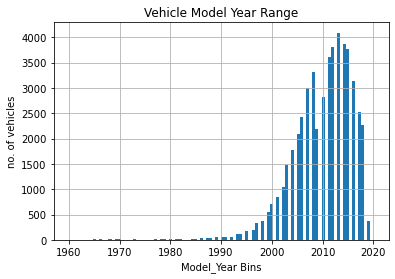

In [78]:
'''The model_year outliers handling'''
data['model_year'].hist(range=(1960,2020), bins=100)
plt.title('Vehicle Model Year Range')
plt.xlabel('Model_Year Bins')
plt.ylabel('no. of vehicles');

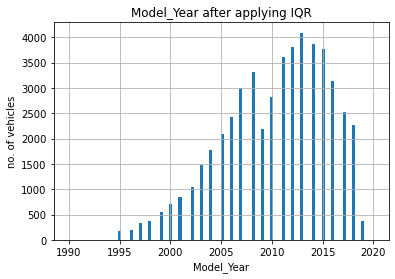

In [79]:
Q1_model_year = data['model_year'].quantile(0.25)
Q3_model_year = data['model_year'].quantile(0.75)
IQR_model_year = Q3_vehicle_age - Q1_vehicle_age
data_model_year_new = data.query('model_year >= @Q1_model_year - 1.5*@IQR_model_year and model_year <= @Q3_model_year+1.5*@IQR_model_year')
data_model_year_new
data_model_year_new.hist('model_year', bins=100, range=(1990,2020))
plt.title('Model_Year after applying IQR')
plt.xlabel('Model_Year')
plt.ylabel('no. of vehicles');

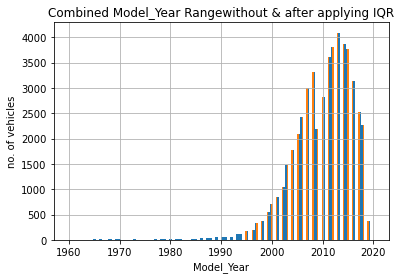

In [80]:
data['model_year'].hist(range=(1960,2020), bins=100) and data_model_year_new['model_year'].hist(range=(1990,2020), bins=100)
plt.title('Combined Model_Year Rangewithout & after applying IQR')
plt.xlabel('Model_Year')
plt.ylabel('no. of vehicles');
plt.show()

The model_year values are starting from 1960 until 2020. Most of the data belongs to the 2000-2020 range. The IQR has removed the outliers and new histogram values are more in range of 2000-2020.

In [81]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500.0,2003,ford f-150,1,8,gas,193850.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,12115
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


In [82]:
'''The condition columns outliers values handling.'''

'The condition columns outliers values handling.'

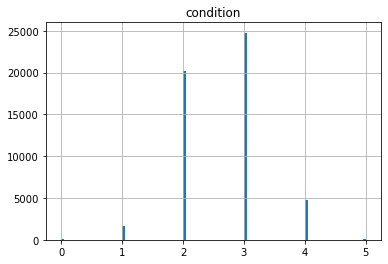

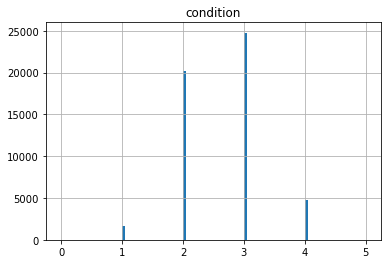

In [83]:
Q1_condition = data['condition'].quantile(0.25)
Q3_condition = data['condition'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
data_condition_new = data.query('condition >= @Q1_condition - 1.5*@IQR_condition and condition <= @Q3_condition+1.5*@IQR_condition')
data_condition_new
data.hist('condition', bins=100)
data_condition_new.hist('condition', bins=100, range=(0,5))
#data['condition'].hist( bins=100) and data_condition_new['condition'].hist(bins=100)

plt.show()

In [84]:
data_condition_new['condition'].unique()

array([2, 4, 1, 3], dtype=int64)

In [85]:
data['condition'].unique()

array([2, 4, 1, 3, 0, 5], dtype=int64)

The condition dataframe values are already belongs to the small range of values which are 0-5. We have observe the new values with IQR but we will not apply IQR because we do not want to lose the unique  values of other categories. The method would be applied for cylinders as well.

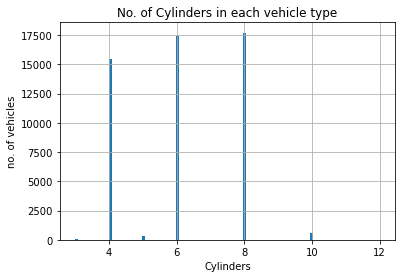

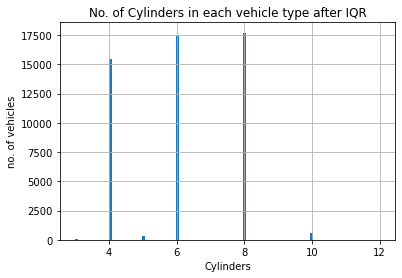

In [86]:
Q1_cylinders = data['cylinders'].quantile(0.25)
Q3_cylinders = data['cylinders'].quantile(0.75)
IQR_cylinders = Q3_cylinders - Q1_cylinders
data_cylinders_new = data.query('cylinders >= @Q1_cylinders - 1.5*@IQR_cylinders and cylinders <= @Q3_cylinders+1.5*@IQR_cylinders')
data_cylinders_new
data.hist('cylinders', bins=100)
plt.title('No. of Cylinders in each vehicle type')
plt.xlabel('Cylinders')
plt.ylabel('no. of vehicles');
data_cylinders_new.hist('cylinders', bins=100)
plt.title('No. of Cylinders in each vehicle type after IQR')
plt.xlabel('Cylinders')
plt.ylabel('no. of vehicles');
plt.show()

In [87]:
'''Odometer Outliers handling'''

'Odometer Outliers handling'

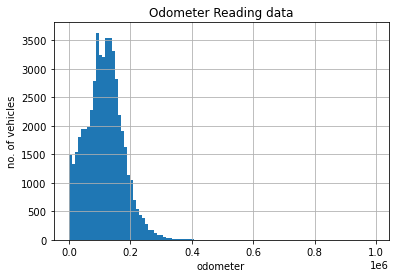

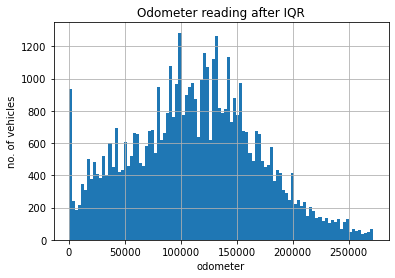

In [88]:
Q1_odometer = data['odometer'].quantile(0.25)
Q3_odometer = data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
data_odometer_new = data.query('odometer >= @Q1_odometer - 1.5*@IQR_odometer and odometer <= @Q3_odometer+1.5*@IQR_odometer')
data_odometer_new
data.hist('odometer', bins=100)
plt.title('Odometer Reading data')
plt.xlabel('odometer')
plt.ylabel('no. of vehicles')
data_odometer_new.hist('odometer', bins=100)
plt.title('Odometer reading after IQR')
plt.xlabel('odometer')
plt.ylabel('no. of vehicles');
plt.show()

After IQR the new data values of odometer are now in range of 0-25000.

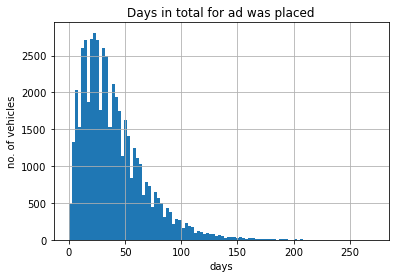

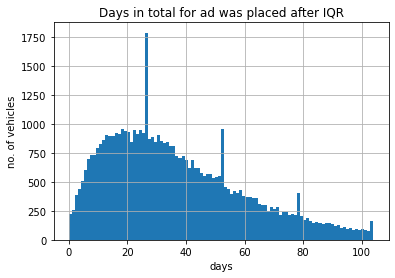

In [89]:
'''Day_listed outliers removal'''

Q1_days_listed = data['days_listed'].quantile(0.25)
Q3_days_listed = data['days_listed'].quantile(0.75)
IQR_days_listed = Q3_days_listed - Q1_days_listed
data_days_listed_new = data.query('days_listed >= @Q1_days_listed - 1.5*@IQR_days_listed and days_listed <= @Q3_days_listed+1.5*@IQR_days_listed')
data_days_listed_new
#data.hist('days_listed', bins=100)
data.hist('days_listed', bins=100)
plt.title('Days in total for ad was placed')
plt.xlabel('days')
plt.ylabel('no. of vehicles')
data_days_listed_new.hist('days_listed', bins=100)
plt.title('Days in total for ad was placed after IQR')
plt.xlabel('days')
plt.ylabel('no. of vehicles');
plt.show()

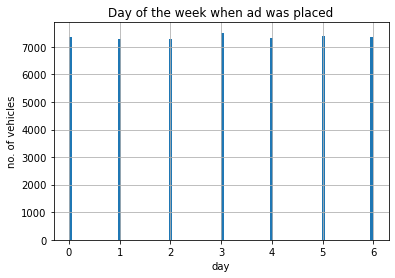

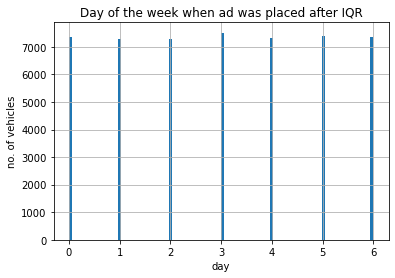

In [90]:
Q1_day_of_week = data['day_of_week'].quantile(0.25)
Q3_day_of_week = data['day_of_week'].quantile(0.75)
IQR_day_of_week = Q3_day_of_week - Q1_day_of_week
data_day_of_week_new = data.query('day_of_week >= @Q1_day_of_week - 1.5*@IQR_day_of_week and day_of_week <= @Q3_day_of_week+1.5*@IQR_day_of_week')
data_day_of_week_new
data.hist('day_of_week', bins=100)
plt.title('Day of the week when ad was placed')
plt.xlabel('day')
plt.ylabel('no. of vehicles')
data_day_of_week_new.hist('day_of_week', bins=100)
plt.title('Day of the week when ad was placed after IQR')
plt.xlabel('day')
plt.ylabel('no. of vehicles');
plt.show()

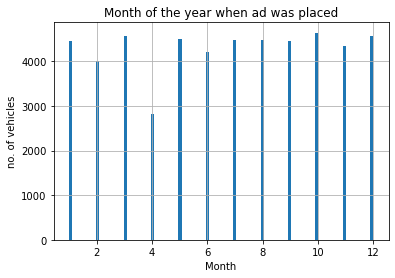

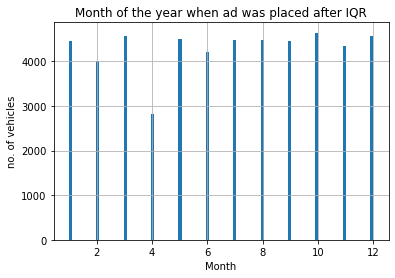

In [91]:
Q1_month = data['month'].quantile(0.25)
Q3_month = data['month'].quantile(0.75)
IQR_month = Q3_month - Q1_month
data_month_new = data.query('month >= @Q1_month - 1.5*@IQR_month and month <= @Q3_month+1.5*@IQR_month')
data_month_new
data.hist('month', bins=100)
plt.title('Month of the year when ad was placed')
plt.xlabel('Month')
plt.ylabel('no. of vehicles')
data_month_new.hist('month', bins=100)
plt.title('Month of the year when ad was placed after IQR')
plt.xlabel('Month')
plt.ylabel('no. of vehicles');
plt.show()

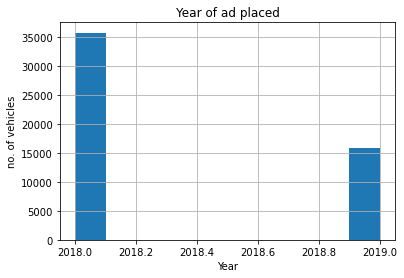

In [92]:
Q1_year = data['year'].quantile(0.25)
Q3_year = data['year'].quantile(0.75)
IQR_year = Q3_month - Q1_month
data_year_new = data.query('year >= @Q1_year - 1.5*@IQR_year and year <= @Q3_year+1.5*@IQR_year')
data_year_new

data_year_new.hist('year')
plt.title('Year of ad placed')
plt.xlabel('Year')
plt.ylabel('no. of vehicles');
plt.show()

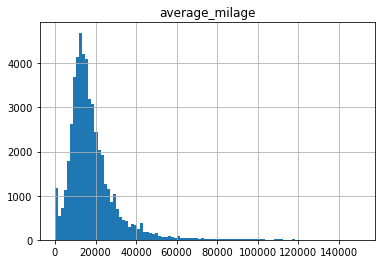

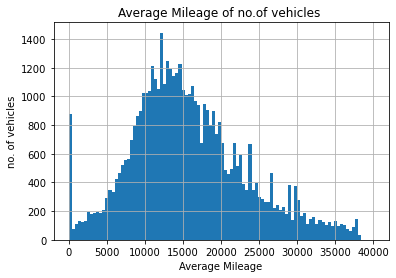

In [93]:
Q1_average_milage = data['average_milage'].quantile(0.25)
Q3_average_milage = data['average_milage'].quantile(0.75)
IQR_average_milage = Q3_average_milage - Q1_average_milage
data_average_milage_new = data.query('average_milage >= @Q1_average_milage - 1.5*@IQR_average_milage and average_milage <= @Q3_average_milage+1.5*@IQR_average_milage')
data_average_milage_new
data.hist('average_milage', bins=100, range=(0,150000))
data_average_milage_new.hist('average_milage', bins=100, range=(0,40000))
plt.title('Average Mileage of no.of vehicles ')
plt.xlabel('Average Mileage')
plt.ylabel('no. of vehicles');
plt.show()

We will follow the same appraoch for day_week, months and year as for cylinders and condition columns. 

#### Section 4.3: Typical lifetime of ads placed <a class="anchor" id="section_4_3"></a>

_-Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time._

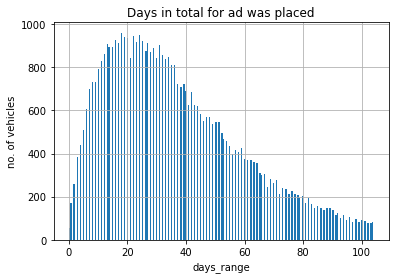

In [94]:
#Lets load and plot the histogram first.
data_days_listed_new.hist('days_listed', bins=200)
plt.title('Days in total for ad was placed')
plt.xlabel('days_range')
plt.ylabel('no. of vehicles');

So mostly cars were sold out within 60 days which is good.

In [95]:
#Mean and Median calculation.

vehicles_ad_mean= data_days_listed_new.pivot_table(index="model", values="days_listed", aggfunc="mean")
vehicles_ad_median=data_days_listed_new.pivot_table(index="model", values="days_listed", aggfunc="median")
vehicles_ad_mean.head()

,days_listed
model,
acura tl,37.668122
bmw x5,38.003937
buick enclave,36.946970
cadillac escalade,38.097087
chevrolet camaro,36.806931


In [96]:
vehicles_ad_median.head()

,days_listed
model,
acura tl,31.0
bmw x5,33.0
buick enclave,32.5
cadillac escalade,33.0
chevrolet camaro,32.5


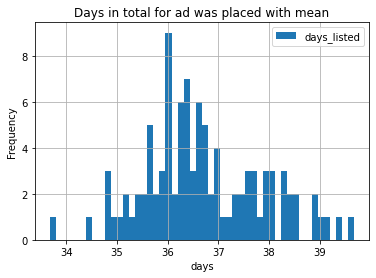

In [97]:
vehicles_ad_mean=vehicles_ad_mean.reset_index()
vehicles_ad_mean
vehicles_ad_mean.plot(x='model', y= 'days_listed', kind='hist', grid=True, bins=50)
plt.title('Days in total for ad was placed with mean')
plt.xlabel('days');

The mean values are not giving a uniform distribution It's look like the people were mostly advertizing/buying on a specific day. That could be weekend. The average the ads have a 30-40 days life time. 

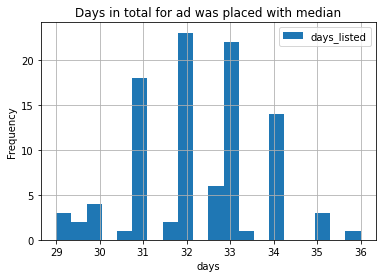

In [98]:
vehicles_ad_median=vehicles_ad_median.reset_index()
vehicles_ad_median
vehicles_ad_median.plot(x='model', y= 'days_listed', kind='hist', grid=True, bins=20)
plt.title('Days in total for ad was placed with median')
plt.xlabel('days');

The median values are also describing the same story with 29-36 days of lifetime.

__Describe the typical lifetime of an ad.__

In [99]:
data_days_listed_new['days_listed'].mean()

36.6719297894083

__Determine when ads were removed quickly, and when they were listed for an abnormally long time.__

In [100]:
data_days_listed_new.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741


In [101]:
Q1_quick_ad = data['days_listed'].quantile(0.25)
Q3_long_ad = data['days_listed'].quantile(0.75)
IQR_typical_ad = Q3_long_ad - Q1_quick_ad
print(Q1_quick_ad)
print(Q3_long_ad)
print(IQR_typical_ad)

19.0
53.0
34.0


To analyze the ad were removed quickly we will use the IQR method as question does not ask with reference of any other column i.e. in terms of age or model. We can say that ads who were removed in 19 or less days were quickly removed and ads whose remain online for 53 days or more were abnormally a long time for an ad to be online. This also shows 34 days as average lifetime of an ad which is close to our mean value of 36.

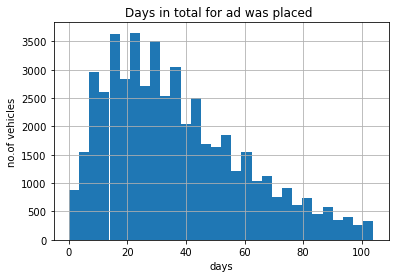

In [102]:
data_days_listed_new.hist('days_listed', bins=30)
plt.title('Days in total for ad was placed ')
plt.ylabel('no.of vehicles')
plt.xlabel('days');

The grapgh above illustrate the before finding about our normal advertisement time. The ad whose were removed before 20 has a high bar compare to after 40.

#### Section 4.4: Average price of each car category and highest selling cars. <a class="anchor" id="section_4_4"></a>

__Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads._


The no. of ads and average price for each car type.


           type  count          mean
                 price         price
0           SUV  12104  10359.897968
1           bus     24  17135.666667
2   convertible    423  12511.617021
3         coupe   2226  13269.010782
4     hatchback   1046   6841.620459
5      mini-van   1157   8004.687986
6       offroad    206  13177.674757
7         other    252  10507.194444
8        pickup   6622  14609.742072
9         sedan  12147   6942.349551
10        truck  11550  14820.840606
11          van    591   8743.340102
12        wagon   1531   8880.496408


The two cars type with highest no. of ads are Sedan and SUV

9    12147
0    12104
Name: (count, price), dtype: int64



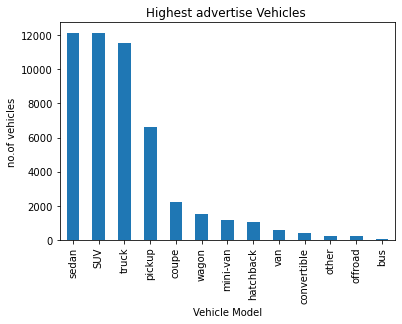

In [103]:
'''Analyze the number of ads and average price for each type of vehicle.'''
number_ads = data_price_new.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
number_ads['mean'].astype('int64')
number_ads=number_ads.reset_index()
'''Plot a graph showing the dependence of the number of ads on the vehicle type.'''
data_price_new["type"].value_counts().plot(kind='bar')
plt.title('Highest advertise Vehicles ')
plt.ylabel('no.of vehicles')
plt.xlabel('Vehicle Model');
print()
print('The no. of ads and average price for each car type.')
print()
print()
print(number_ads)
print()
print()
print('The two cars type with highest no. of ads are Sedan and SUV')
print()
print(number_ads['count','price'].nlargest(2))
print()

plt.show()

#### Section 4.5: Factors impact the price most <a class="anchor" id="section_4_5"></a>

__What factors impact the price most? Take each of the popular types detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.__

In [104]:
data_price_new.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500.0,2003,ford f-150,1,8,gas,193850.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,12115
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


First the data with each of the 2 most popular types was filtered, then, for each, then apply .value_counts() in each category to check there is at least 50 ads. Finally the correlation between price and age, price and mileage, price and condition etc were analyzed.

In [105]:
new_data=data_price_new[data_price_new['type'].isin(['sedan','SUV'])]
len(new_data)

24251

In [106]:
len(new_data[new_data['type']=='SUV'])

12104

In [107]:
len(new_data[new_data['type']=='sedan'])

12147

In [108]:
len(new_data[new_data['type']=='SUV']) + len(new_data[new_data['type']=='sedan'])

24251

In [109]:
new_data['type'].value_counts()

sedan    12147
SUV      12104
Name: type, dtype: int64

In [110]:
new_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_milage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451
5,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488
6,12990.0,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404


__price_age_corr__

In [111]:
price_age_corr=new_data['price'].corr(new_data['vehicle_age'])
print('The correlation between price and age is {:.2f}'.format(price_age_corr))

The correlation between price and age is -0.48


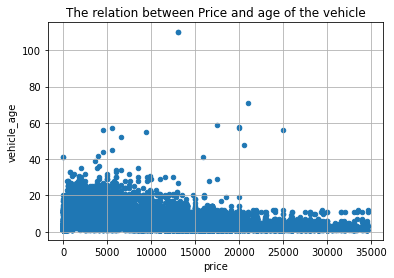

In [112]:
new_data.plot(x='price', y='vehicle_age', kind='scatter', grid=True)
plt.title('The relation between Price and age of the vehicle');

From the graph above the most of the cars come under 20 years of usage. The correlation is negative between these two variables.

In [113]:
y_y=new_data[['price','model_year','condition','cylinders','odometer','is_4wd','vehicle_age','average_milage']]
y_y.head()

,price,model_year,condition,cylinders,odometer,is_4wd,vehicle_age,average_milage
0,9400.0,2011,2,6,145000.0,1,7,20714
2,5500.0,2013,4,4,110000.0,0,6,18333
4,14900.0,2017,3,4,80903.0,0,2,40451
5,14990.0,2014,3,6,57954.0,1,4,14488
6,12990.0,2015,3,4,79212.0,0,3,26404


In [114]:
y_numeric=['price', 'model_year', 'condition', 'cylinders', 'odometer', 'is_4wd', 'vehicle_age','average_milage']
#new_data['price'].corr(new_data['vehicle_age'])
for i in y_numeric:
    yyy=new_data['price'].corr(new_data[i])
    print('The correlation between price and {} is:'.format(i), round(yyy, 2))


The correlation between price and price is: 1.0
The correlation between price and model_year is: 0.48
The correlation between price and condition is: 0.26
The correlation between price and cylinders is: 0.12
The correlation between price and odometer is: -0.45
The correlation between price and is_4wd is: 0.26
The correlation between price and vehicle_age is: -0.48
The correlation between price and average_milage is: 0.2


The price varialve highly depending on model_year variable and the condition & cylinders come on second. The vehicle_age has most negative dependant upon price. It's strange as first mostly vintage cars were selling very fast so observation was that may be these cars also has a high price. 

__Scatter plots for each numerical variable with dependant of price.__

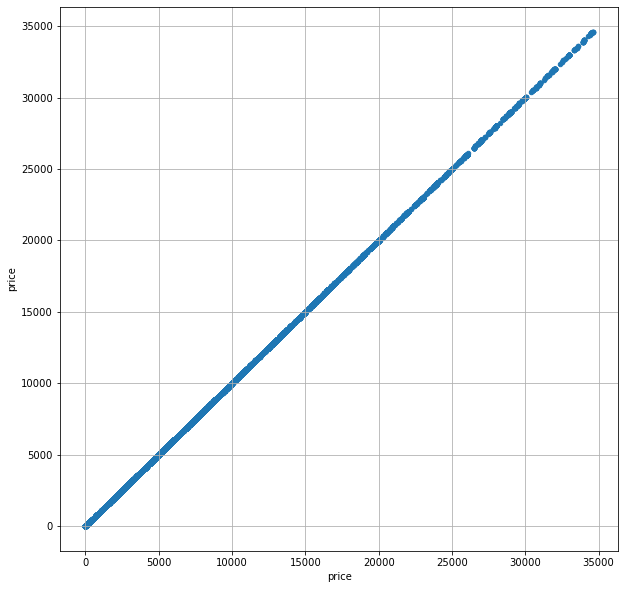

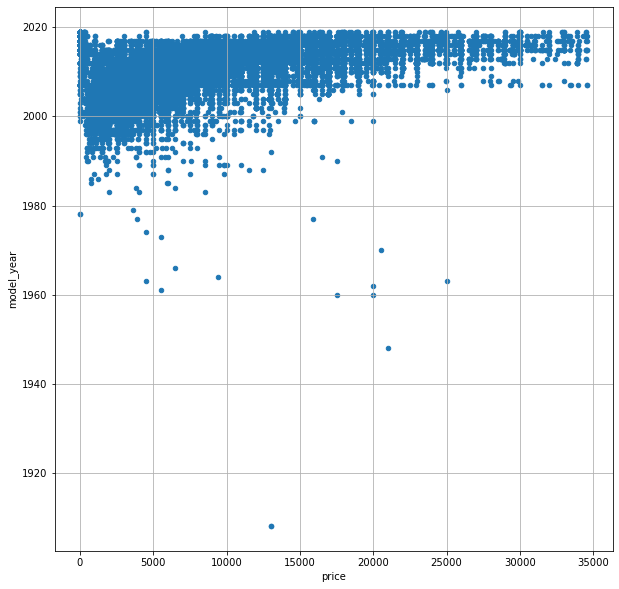

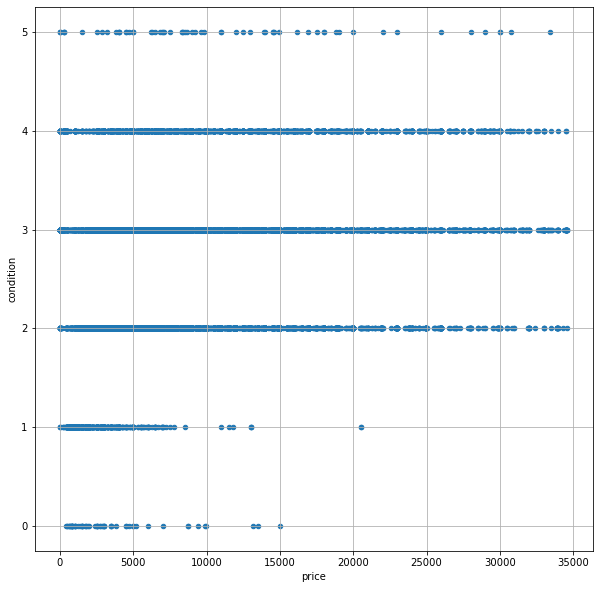

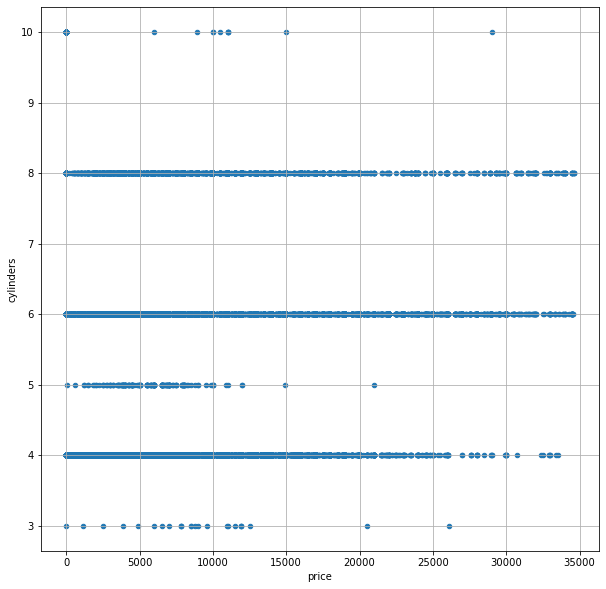

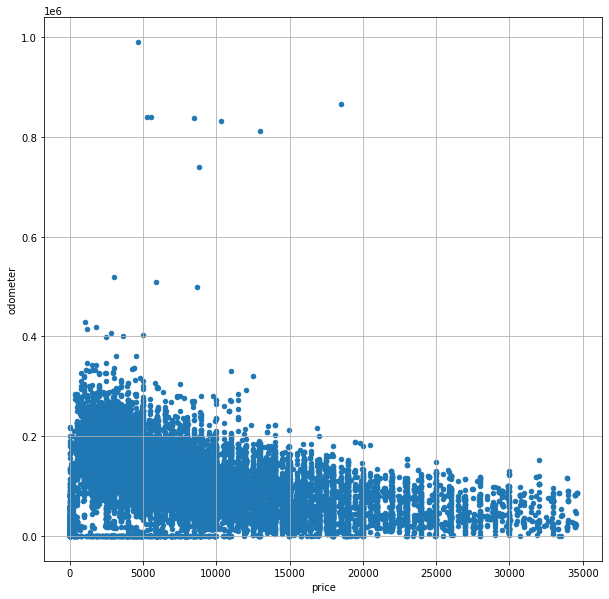

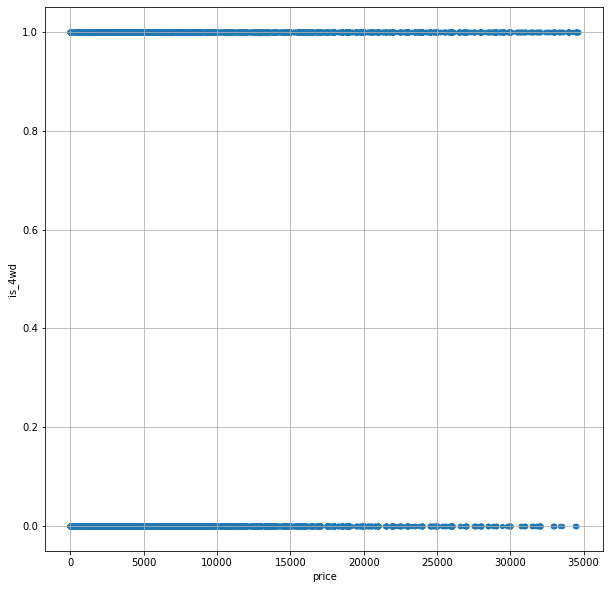

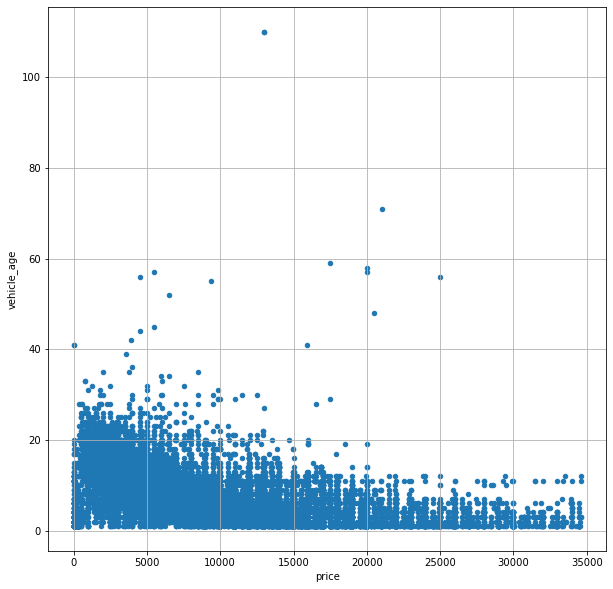

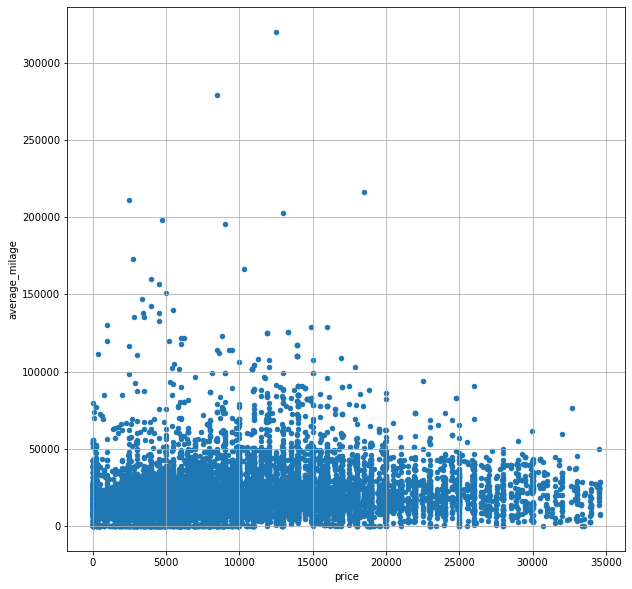

In [115]:
#data_hist[numerical].hist(bins=15, figsize=(15, 40), layout=(12, 2));
y_numeric=['price', 'model_year', 'condition', 'cylinders', 'odometer', 'is_4wd', 'vehicle_age','average_milage']
for i in y_numeric:
    new_data.plot(x='price', y=i, kind='scatter', grid=True, figsize=(10,10))

In [116]:
price_type=new_data['price'].corr(new_data['type'].astype('category').cat.codes)
print('The correlation between price and type is {:.2f}'.format(price_type))

The correlation between price and type is -0.28


In [117]:
y_categorical = ['model', 'fuel', 'transmission', 'type', 'paint_color']


#new_data['price'].corr(new_data['vehicle_age'])
for i in y_categorical:
    yyy=new_data['price'].corr(new_data[i].astype('category').cat.codes)
    print('The correlation between price and {} is:'.format(i), round(yyy, 2))
    
#https://stackoverflow.com/questions/51241575/calculate-correlation-between-columns-of-strings/51241909

The correlation between price and model is: -0.02
The correlation between price and fuel is: -0.04
The correlation between price and transmission is: -0.05
The correlation between price and type is: -0.28
The correlation between price and paint_color is: -0.03


As for categorical variable concern the model looks a little attractive for customers otherwise remaining factors don't have a significant impact on price.

__Boxplot for Categorical Variables__

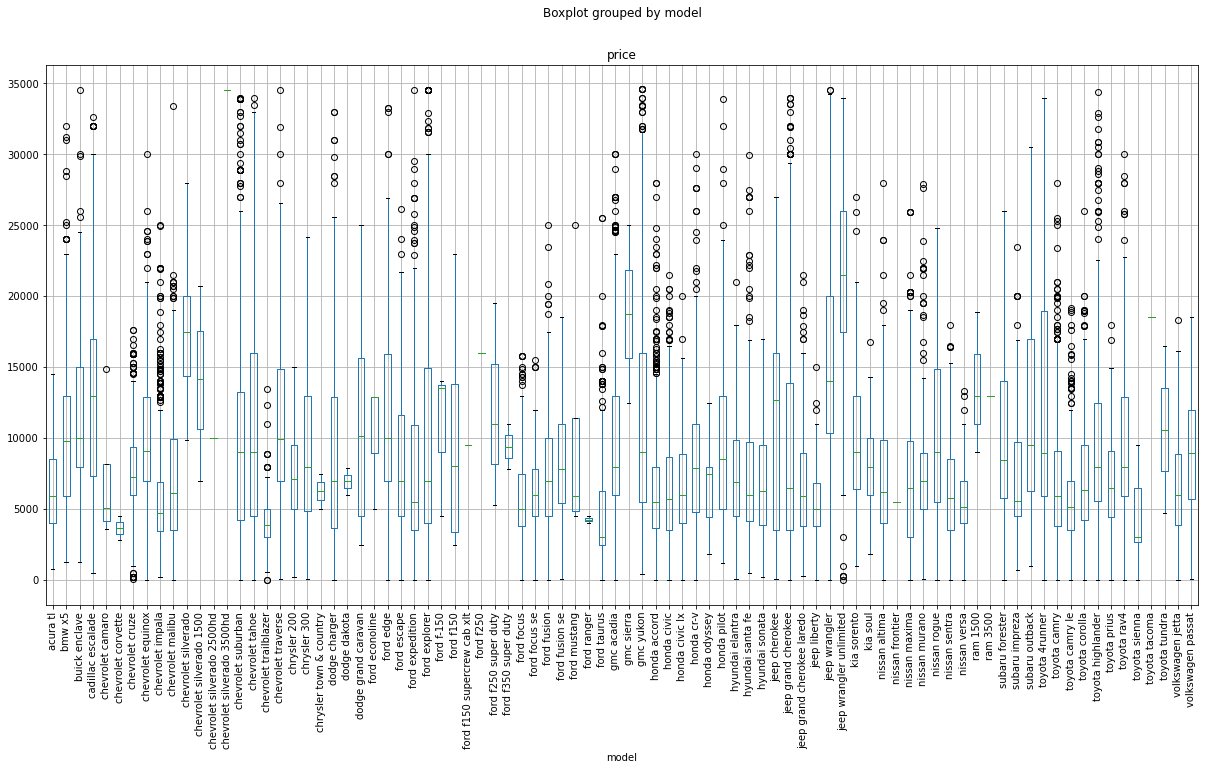

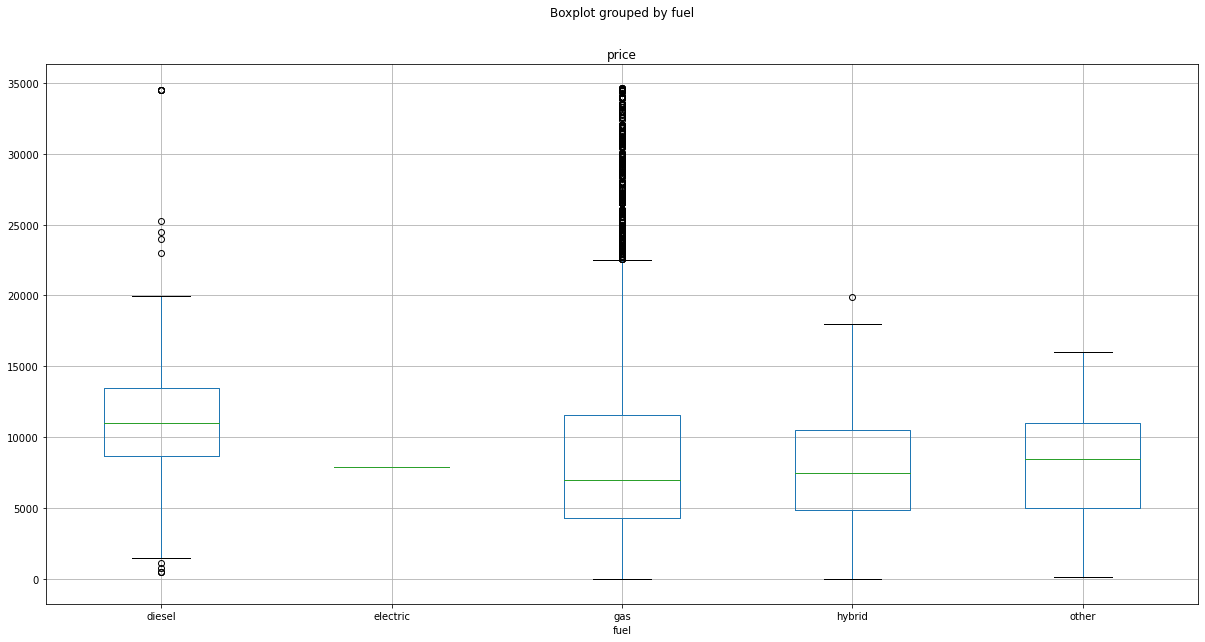

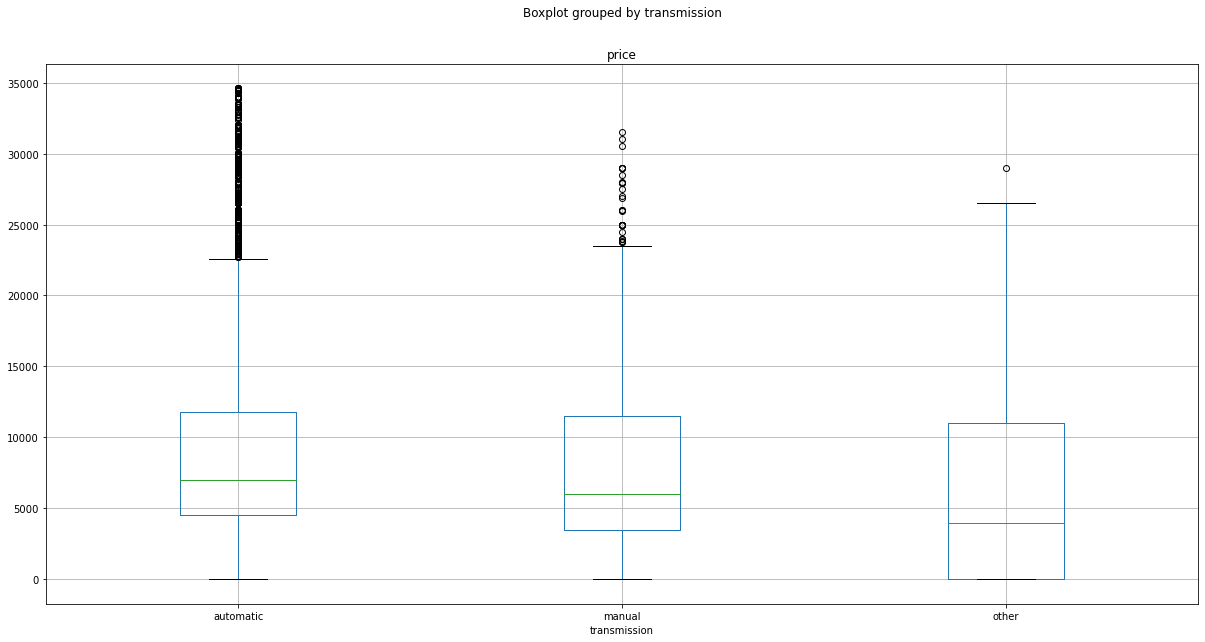

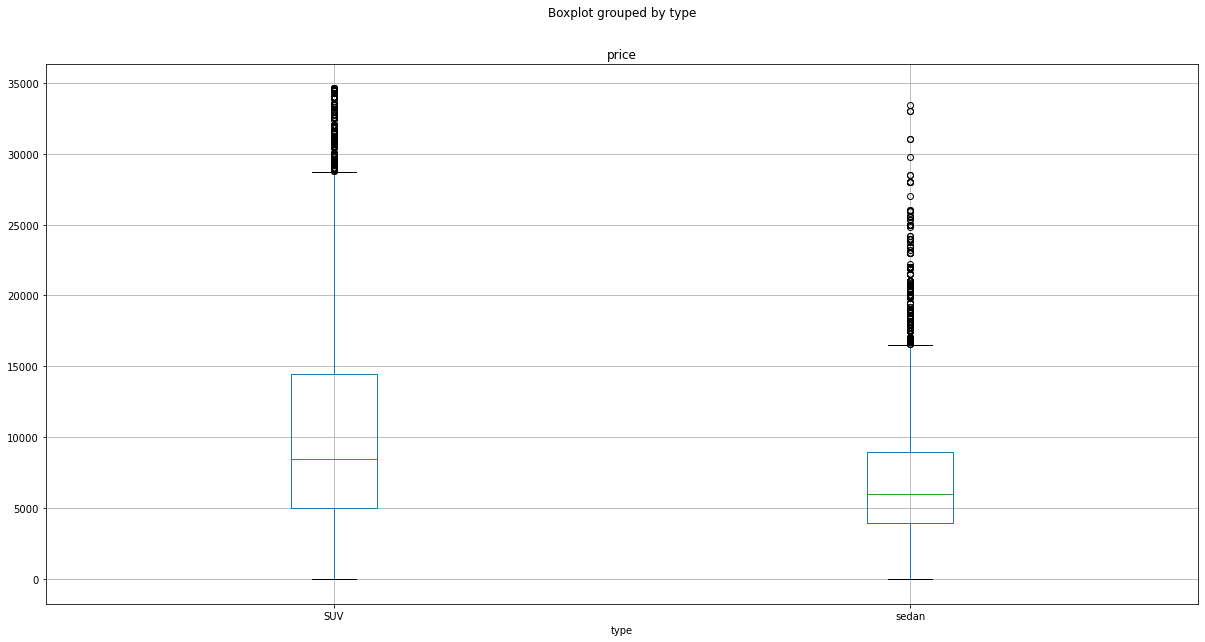

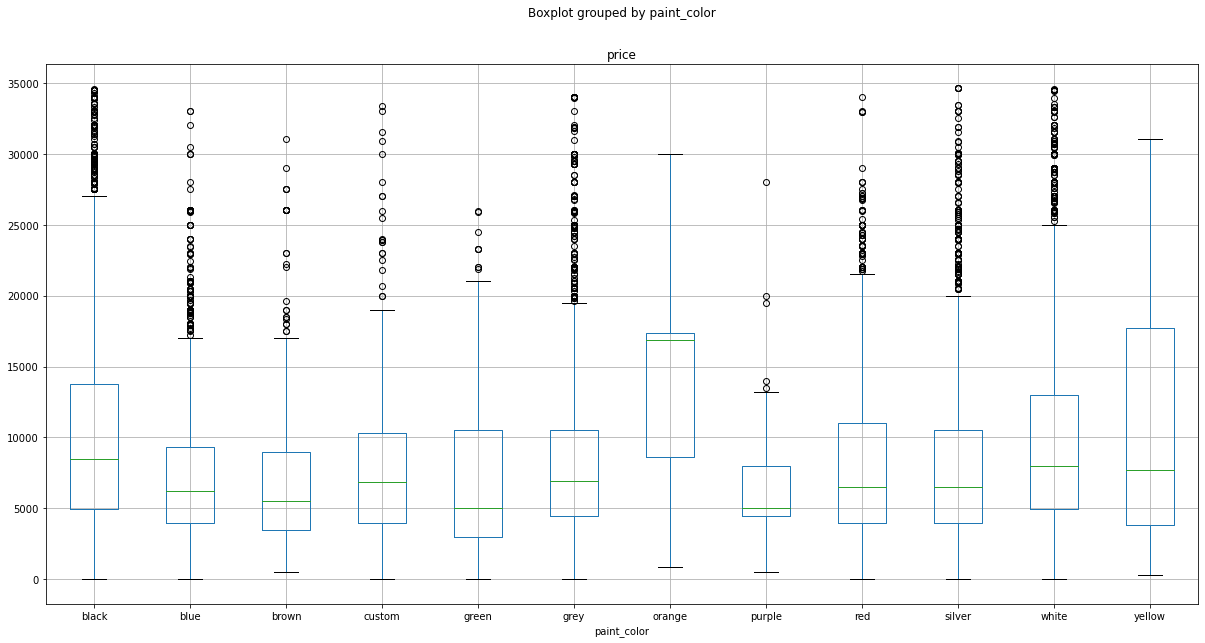

In [118]:
y_categorical = ['model', 'fuel', 'transmission', 'type', 'paint_color']

for i in y_categorical:
    if i=='model':
            new_data.boxplot(column=['price'], by=i,return_type='axes', figsize=(20,10))
            plt.xticks(rotation = 90);
    else:
        new_data.boxplot(column=['price'], by=i,return_type='axes', figsize=(20,10))

The above visualization of categorical variables describes relation between the varibale in terms of price . The first graph between model and price demonstrated the skeness of data towards the price. there is not a neutral correlation between them and variables has negative correlation between them. 

The second graph between price and fuel type, the linear relation between price and hybrid models is neutral and diesel as well, the electric cars has very limited no of cars advertise so the relation cannot be describe. For gas the relation is skew towards gas which can be said the more mileage the less price. 

The price and transmission also has a negative relation and for the model megative as well. Some paint color are more attractive to customers i.e. white and black.

The overall observation is that the car price in depending upon one variable but it could be the factor depending upon two or more combine varibles. 

### Chapter 5: Conclusion <a class="anchor" id="chapter5"></a>

The dataset is a detailed of ads published on a online selling/buying car website. There are total 51525 indices in the dataset.
By Applying the info() methods we can observe that columns, model_year,cylinders, odometer, paint_color, and is_4wd have less values compare to total indicies.So the isna and sum functions have given us number of missing values in each column. The most interesting is is_4wd. The quite reason for missing values in this column is as it is a boolean datatype so missing values could be False or 0.As discusssed above, we have filled the is_4wd column values with 0 as it's a booleanvalues which represents either the car is 4WD or not. Secondly, the total number of missing values is half of total values in this column. The approach to fill missing indicies in model_year column, the model, is_4wd, transmission, and type can help because these are core specifications of any model. We will use groupby() methods and group data. To observe the realtion between data columns, the idea is to group model column with other specification and observe the preciseness of idx. i.e. in how many groups the data has divided. i.e. when the model and is_4wd colmuns were grouped, the idx has only two values which 3,2. The second finding could be, is the same model car has other specifications i.e. type, transmission are same or not? if they are same so we will use the group data to fill missing value.We will also check the mode and median of the column, so that we can decide which is more accurate to fill the missing value. We will apply this methodology first to one kind of car models, the model bmw x5 is grouped into two subgrouped.The mode and median methods have applied and filled the missing values. The data was grouped with model and applied transform method. The histogram was plotted for each methods and observe how well the filled values are fitted compare to actual dataset.The year 2013 looks good year for car manufacturing companies. The number of cars belong to this group is almost double than average of other years. That's thr mode, it's evince that we can use mode rather than median to fill the missing values because year 2013 can't be ignore. After filling values in model_year we has come to  (cylinders, odometer, paint_color) columns. The missing values in cylinders has filled by grouping the data column model with it's type of vehicles. Definitely, the truck, bus would have different no. of cyliners compare to the sedan or mini-van. There were still 15 values missing in cylinders. The reason of missing values in the cylinders columns is was the model type is different for each car in the model column. There is also a typo for ford f250 and ford f-250. The remaining missing values have replaced with the median of overall median of the cyliners data.The missing values in paint_color has filled with the mode of the car colors with grouping model. The odometer missing values have replaced with the same methods as median. There are 7 missing values remaining in odometer. It was observed that ford mustang, chevrolet impala, ford f-150, cadillac escalade have no other group values so we filled with median. For chevrolet corvette we have replace with a manual median value.

The columns model, condition, fuel, transmission, type, paint_color, and date_posted are string (object) datatype so we don't need to change these values. But the price, model_year, cyliners and is_4wd are float or int types. The price has change with float as the is more realistic but the other columns values need to be even number but not whole so they have converted to the integer datatype. The conditon column values were replaced with numeric scale from 0 to 5.


In the exploratory data analysis, the outliers were handled and cleaned dataset was created. The histograms of price, vehicle's age when ad was placed, mileage, number of cylinders, and conditon have plotted to observed the outliers.

The most of price lies under range 30,000. The remaining value after looks like outliers which we will handle in the next steps. The models of car moslty lied in 2000 to 2020 range, with average_milage mostly belongs to 0-20000 range. The mostly car has 8 cylinders and other has 6, 4 , 10, 5, or 3 cylinders. The remaining values belongs to minimal categories.The mostly cars are in execellent labelled category followed by good and fair and salvage have very less valeus.The new cars (age=1) are alot in market for new sale. Why so? Mostly cars are under 10 years old. After 30 years of cars are mereley available in market to resale. For removing the outliers the interquartile range (IQR) was applied, based on dividing a data set into quartiles. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively. The IQR values were calculated for the each variables data's outliers were removed by query method, Afterward the histogram for each variable was plotted. For the numerical variables histograms were plotted to visualize the data and boxplot were plotted for the categorical varaibles.

The average time period of the ad is 37.5 days and mostly cars were sold in 60 days. One of the finding is that vintage cars have high demand in market and they were sold quite quick compare to the other models. Second reason for the quick removal of ad for vintage cars is the number of available car for selling which is very low compare to the other models. This analysis shows that the cars whose were literally new have a low reselling rate. The ads for these cars lived for almost 37 days. The two cars type with highest no. of ads are Sedan and SUV with 12147 and 12104 respectively.

To observe the factor mostly affecting the price, first the data with each of the 2 most popular types was filtered, then, for each, then apply .value_counts() in each category to check there is at least 50 ads. Finally the correlation between price and age, price and mileage, price and condition etc were analyzed.The correlation will be calculated to observe the dependance of different variables on price.The price varialve highly depending on model_year variable and the condition & cylinders come on second. The vehicle_age has most negative dependant upon price. It's strange as first mostly vintage cars were selling very fast so observation was that may be these cars also has a high price. As for categorical variable concern the model looks a little attractive for customers otherwise remaining factors don't have a significant impact on price. At the end scatter and boxplot were plotted to visualize the final results.